<a href="https://colab.research.google.com/github/saksham1211/Marketingai_Internship/blob/master/Logo_and_Type_Detection_%5BALL_COMPANIES%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOGO AND TYPE OF FORM DETECTION
In this notebook I have implemented the concepts of object detection and loaded the already trained model (YoloV3), which has been trained on the custom dataset(401 K investment companies logo and type of form).

I annotated the images using "LabellImg", and then train the model. In this part of the notebook, we have focussed on the 'detection' part and not on the 'training' part.

*The following notebook contains code only of the detection of logo and the type of form.*

**Input:-** IMAGE [*JPEG*]

**Output:-** *Company Name* [Merrill Lynch, Charles Schwab, Fidelity, American Trade] and  *Type of Form* [IRA, Client Account Transfer Form.....]

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip3 install tensorflow-gpu==1.13.1

In [0]:
!pip3 install imageai --upgrade

In [0]:
IMAGE_PATH = "/content/3.jpg"

In [52]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()

detector.setModelTypeAsYOLOv3()

prediction_dictionary= {}
prediction_name=[]
prediction_probab=[]

detector.setModelPath("/content/drive/My Drive/PASCAL_DATASET/models/detection_model-ex-027--loss-0007.398.h5") 
detector.setJsonPath("/content/drive/My Drive/PASCAL_DATASET/json/detection_config.json")
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=IMAGE_PATH, output_image_path="logo_detected_image.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    prediction_name.append(detection["name"])
    prediction_probab.append(detection["percentage_probability"])
prediction_dictionary = dict(zip(prediction_probab, prediction_name))
index1 = sorted(prediction_dictionary.keys())[-1]
index2 = sorted(prediction_dictionary.keys())[-2]
  

Client Account Transfer Form  :  98.4982967376709  :  [375, 35, 989, 109]
Merrill Lynch  :  99.04277920722961  :  [1247, 38, 1644, 190]
Client Account Transfer Form  :  51.70887112617493  :  [1271, 56, 1630, 170]


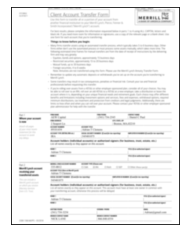


The company name is  Merrill Lynch
Type of Form is  Client Account Transfer Form


In [53]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/logo_detected_image.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()
print()
if prediction_dictionary[index1] in ['Charles Schwab', 'Merrill Lynch', 'Fidelity', 'American Funds']:
  print("The company name is ", prediction_dictionary[index1])
  print("Type of Form is ", prediction_dictionary[index2])
else:
  print("The company name is ", prediction_dictionary[index2])
  print("Type of form is ", prediction_dictionary[index1])